<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-4-Sprint-4-Deep-Learning/blob/master/Trista_CNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install google_images_download

     |████████████████████████████████| 911kB 4.1MB/s 
  Stored in directory: /root/.cache/pip/wheels/22/f3/7b/d1d7a18d9784458622ef3f9702c0bdbc179b431adde169c1a0
Successfully built google-images-download


# Assignment

Load a pretrained network from TensorFlow Hub, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
images = ...  # A batch of images with shape [batch_size, height, width, 3].
logits = module(images)  # Logits with shape [batch_size, num_classes].
```

Apply it to classify the images downloaded below (images from a search for animals in national parks):

In [2]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "animal national park", "limit": 20,
             "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = animal national park
Evaluating...
Starting Download...
Image URL: https://i.ytimg.com/vi/P8NJa_YoRxk/maxresdefault.jpg
Completed Image ====> 1.maxresdefault.jpg
Image URL: https://npca.s3.amazonaws.com/images/8135/2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg?1445969501
Completed Image ====> 2.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
Image URL: https://www.nps.gov/arch/learn/nature/images/ARK_6.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 3.ARK_6.jpg
Image URL: https://greenglobaltravel.com/wp-content/uploads/2017/04/Best-National-Parks-In-USA-For-Wildlife-Watching.jpg
Completed Image ====> 4.Best-National-Parks-In-USA-For-Wildlife-Watching.jpg
Image URL: https://www.nps.gov/voya/learn/nature/images/VOYA_web_deer.jpg?maxwidth=1200&maxheight=1200&autorotate=false
Completed Image ====> 5.VOYA_web_deer.jpg
Image URL: https://www.kideponationalpark.com/wp-content/uploads/2016/11/zebras-in-kidepo-750x450.jpg
Completed Image =

In [4]:
import os
animals = os.listdir('downloads/animal national park')
animals

['15.Img6485.jpg',
 '4.Best-National-Parks-In-USA-For-Wildlife-Watching.jpg',
 '17.nairobi-national-park.jpg',
 '2.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg',
 '9.addo-elephant-national-park-elephants-590x390.jpg',
 '7.spot-denali-national-parks-animals.jpg',
 '14.national-parks-and-wildlife-sanctuaries-in-india.png',
 '20._105391047_gettyimages-803131144.jpg',
 '16.maxresdefault.jpg',
 '10.084ac382-5aff-4674-9555-482e5ff07c0b-banner.jpg',
 '12.2014-06-03-ChitwanNationalParkOlance.jpg',
 '1.maxresdefault.jpg',
 '3.ARK_6.jpg',
 '18.a2d539ed-8489-4eb4-a135-14e7e9e0e84a-banner.jpg',
 '13.elephant-seal.jpg',
 '8.Royal-Bengal-Tiger.jpg',
 '6.zebras-in-kidepo-750x450.jpg',
 '11.Gir-Forest-National-Park-1.jpg',
 '5.VOYA_web_deer.jpg',
 '19.2-day-kruger-slider1.jpg']

# line by line resnet50 application

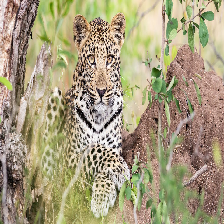

In [0]:
from keras.preprocessing import image
leopard = image.load_img('downloads/animal national park/1.maxresdefault.jpg', target_size=(224, 224, 3))
leopard

In [0]:
leopard = image.img_to_array(leopard)
leopard

array([[[227., 208., 202.],
        [230., 219., 213.],
        [238., 211., 202.],
        ...,
        [153., 149., 104.],
        [225., 201., 175.],
        [186., 168., 154.]],

       [[215., 200., 197.],
        [245., 235., 233.],
        [203., 183., 176.],
        ...,
        [177., 170., 124.],
        [231., 210., 181.],
        [198., 181., 163.]],

       [[230., 215., 212.],
        [246., 234., 234.],
        [209., 194., 191.],
        ...,
        [230., 215., 172.],
        [230., 209., 178.],
        [216., 198., 176.]],

       ...,

       [[ 89., 101.,  61.],
        [ 98., 102.,  69.],
        [ 76.,  72.,  43.],
        ...,
        [150., 120., 110.],
        [134., 129.,  97.],
        [153., 137., 104.]],

       [[ 69.,  86.,  44.],
        [ 93., 106.,  63.],
        [108., 115.,  74.],
        ...,
        [165., 139., 126.],
        [170., 167., 134.],
        [243., 228., 195.]],

       [[ 60.,  78.,  38.],
        [ 85., 100.,  57.],
        [ 84.,  

In [0]:
import numpy as np
leopard = np.expand_dims(leopard, axis=0)
leopard

array([[[[227., 208., 202.],
         [230., 219., 213.],
         [238., 211., 202.],
         ...,
         [153., 149., 104.],
         [225., 201., 175.],
         [186., 168., 154.]],

        [[215., 200., 197.],
         [245., 235., 233.],
         [203., 183., 176.],
         ...,
         [177., 170., 124.],
         [231., 210., 181.],
         [198., 181., 163.]],

        [[230., 215., 212.],
         [246., 234., 234.],
         [209., 194., 191.],
         ...,
         [230., 215., 172.],
         [230., 209., 178.],
         [216., 198., 176.]],

        ...,

        [[ 89., 101.,  61.],
         [ 98., 102.,  69.],
         [ 76.,  72.,  43.],
         ...,
         [150., 120., 110.],
         [134., 129.,  97.],
         [153., 137., 104.]],

        [[ 69.,  86.,  44.],
         [ 93., 106.,  63.],
         [108., 115.,  74.],
         ...,
         [165., 139., 126.],
         [170., 167., 134.],
         [243., 228., 195.]],

        [[ 60.,  78.,  38.],
       

In [0]:
from keras.applications.resnet50 import preprocess_input
leopard = preprocess_input(leopard)
leopard

array([[[[  -0.6190033 ,  -25.557999  ,  -25.619003  ],
         [   2.3809967 ,  -14.557999  ,  -14.619003  ],
         [  10.380997  ,  -22.557999  ,  -25.619003  ],
         ...,
         [ -74.619     ,  -84.558     , -123.619     ],
         [  -2.6190033 ,  -32.558     ,  -52.619003  ],
         [ -41.619003  ,  -65.558     ,  -73.619     ]],

        [[ -12.619003  ,  -33.558     ,  -30.619003  ],
         [  17.380997  ,    1.4420013 ,    5.3810043 ],
         [ -24.619003  ,  -50.558     ,  -51.619003  ],
         ...,
         [ -50.619003  ,  -63.558     , -103.619     ],
         [   3.3809967 ,  -23.557999  ,  -46.619003  ],
         [ -29.619003  ,  -52.558     ,  -64.619     ]],

        [[   2.3809967 ,  -18.557999  ,  -15.619003  ],
         [  18.380997  ,    0.44200134,    6.3810043 ],
         [ -18.619003  ,  -39.558     ,  -36.619003  ],
         ...,
         [   2.3809967 ,  -18.557999  ,  -55.619003  ],
         [   2.3809967 ,  -24.557999  ,  -49.619003  ],
  

In [0]:
from keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet')
features = model.predict(leopard)
features

array([[7.58106378e-09, 1.60859793e-06, 5.20765934e-06, 8.61457829e-06,
        1.12121718e-07, 1.22808316e-07, 1.40103305e-06, 3.04339283e-05,
        3.74087467e-05, 3.14630574e-06, 1.07841367e-06, 5.57616772e-07,
        8.22351808e-07, 3.16065837e-07, 6.84331454e-08, 9.88855163e-07,
        3.68825361e-08, 7.20244316e-07, 2.34019367e-07, 3.93066784e-07,
        3.45007152e-06, 3.01083190e-07, 3.10523160e-06, 3.73402213e-06,
        3.35429009e-04, 3.78023429e-07, 1.55054266e-07, 1.10977901e-07,
        1.12560336e-07, 2.55941785e-07, 7.91758521e-06, 4.37329181e-05,
        2.58550494e-06, 2.20262564e-06, 7.78303183e-06, 9.03751470e-07,
        6.68859429e-05, 9.98258429e-07, 2.21558130e-05, 3.11102979e-02,
        2.46795225e-05, 9.79256220e-06, 7.73772699e-05, 4.52952459e-03,
        2.34298750e-05, 5.52058809e-05, 1.54576148e-04, 9.74638169e-07,
        5.00306138e-04, 1.87130366e-03, 2.82988022e-03, 9.32452531e-06,
        7.78222216e-08, 1.87801401e-08, 5.50132836e-06, 3.350026

In [0]:
from keras.applications.resnet50 import decode_predictions

results = decode_predictions(features, top=3)[0]

40960/35363 [==================================] - 0s 0us/step


In [0]:
results

[('n02129604', 'tiger', 0.51315427),
 ('n02123159', 'tiger_cat', 0.3254837),
 ('n03388043', 'fountain', 0.044922084)]

# Applying resnet50 in a function

In [5]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions

W0516 01:01:53.071034 139872940808064 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14
Using TensorFlow backend.


In [0]:
def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_prediction(img):
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  model = ResNet50(weights='imagenet')
  features = model.predict(x)
  results = decode_predictions(features, top=3)[0]
  return results

In [0]:
module = hub.Module("https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1")
height, width = hub.get_expected_image_size(module)
#images = ...  # A batch of images with shape [batch_size, height, width, 3].
#logits = module(images)  # Logits with shape [batch_size, num_classes].

In [21]:
#couldn't get view to work in loop, but predictions are at least labelled by jpg
for pic in animals:
    path = 'downloads/animal national park/'+str(pic)
    print(path)
    view = image.load_img(path, target_size=(224, 224, 3))
    print(img_prediction(view))

downloads/animal national park/15.Img6485.jpg
[('n02361337', 'marmot', 0.9998926), ('n02138441', 'meerkat', 7.490677e-05), ('n02137549', 'mongoose', 2.6379847e-05)]
downloads/animal national park/4.Best-National-Parks-In-USA-For-Wildlife-Watching.jpg
[('n02410509', 'bison', 0.99975306), ('n07802026', 'hay', 0.00010129162), ('n02403003', 'ox', 5.7782574e-05)]
downloads/animal national park/17.nairobi-national-park.jpg
[('n02391049', 'zebra', 0.99995625), ('n02422106', 'hartebeest', 2.0407286e-05), ('n02422699', 'impala', 1.1149621e-05)]
downloads/animal national park/2.2c7e0d75-c7ff-4336-99d7-259448d03a4d-banner.jpg
[('n02120505', 'grey_fox', 0.29400292), ('n02114367', 'timber_wolf', 0.11311486), ('n02114855', 'coyote', 0.10668613)]
downloads/animal national park/9.addo-elephant-national-park-elephants-590x390.jpg
[('n02504458', 'African_elephant', 0.9674866), ('n02408429', 'water_buffalo', 0.012640192), ('n02504013', 'Indian_elephant', 0.0105395615)]
downloads/animal national park/7.sp

# Conclusions

I like how it's not only wrong on the elk looking ungulate, it predicts extremely confidently that it's a **marmot**, an obscure rodent that looks like a miniature bear with a squirrel's face. I would do that if I were an image classifier, too, in denial I am not looking at such a charming animal. All the ideas it had for that picture were rodent like. The picture depicts a herd rather than one animal which has it going against it.